<a href="https://colab.research.google.com/github/vindhya9848/Python-DataScience/blob/main/Smart_Health_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title: Smart Health Tracker Insights

This project explores data collected from wearable fitness devices to uncover meaningful health patterns and deliver personalized wellness recommendations. The dataset comprises 30,000 entries with features including age, gender, daily steps, heart rates, hours of sleep, calorie intake, stress levels, sleep quality, activity types, and mood. Through this data, we aim to apply regression to predict sleep and calorie metrics, classification to understand mood and stress, clustering to identify user behavior patterns, and time series analysis to observe trends over time. The project combines statistical analysis and machine learning to enable data-informed health interventions.
Smart Health Tracker
Data Set Decription:

Age \
Gender \
Daily Steps \
Resting Heart Rate \
Active Heart Rate \
Hours of Sleep \
Daily Calorie Intake \
Stress Level (0-10 scale) \
Sleep Quality (0-100 score) \
Daily Activity Type(categorical:sedentary, moderate, intense) \
Mood (multiclass: sad, neutral, happy) \

In [1]:
# Reset float display format to default
# pd.reset_option('display.float_format')

# Load the data
import pandas as pd
df= pd.read_csv('smart_health_tracker_data.csv')
print(df.head())


    Age  Gender  Daily_Steps  Resting_Heart_Rate  Active_Heart_Rate  \
0  40.0     NaN      13116.0                61.0              136.0   
1  33.0  Female       1138.0                57.0              112.0   
2  42.0    Male      10742.0                62.0              140.0   
3  53.0    Male      12092.0                65.0              128.0   
4  32.0  Female      12519.0                56.0              105.0   

   Hours_of_Sleep  Daily_Calorie_Intake  Stress_Level  Sleep_Quality  \
0             9.7                4000.0           3.0           80.0   
1             4.9                1677.0           9.0           54.0   
2             5.5                4000.0           8.0           60.0   
3             6.5                4000.0           2.0           94.0   
4             6.5                4000.0           9.0           57.0   

  Daily_Activity_Type     Mood  
0             Intense      Sad  
1           Sedentary  Neutral  
2           Sedentary  Neutral  
3       

In [2]:
import pandas as pd

# Calculate percentage of missing values per column
missing_percent = df.isnull().mean() *100

# Display
print(missing_percent.sort_values())

Age                     1.0
Gender                  1.0
Daily_Steps             1.0
Resting_Heart_Rate      1.0
Active_Heart_Rate       1.0
Hours_of_Sleep          1.0
Daily_Calorie_Intake    1.0
Stress_Level            1.0
Sleep_Quality           1.0
Daily_Activity_Type     1.0
Mood                    1.0
dtype: float64


In [3]:
# Fill the missing values

# Fill numerical features
df['Age'] = df['Age'].fillna(df['Age'].median())
# why only median: it is not effected by outliers, represents the center point
df['Daily_Steps'] = df['Daily_Steps'].fillna(df['Daily_Steps'].mean())
df['Resting_Heart_Rate'] = df['Resting_Heart_Rate'].fillna(df['Resting_Heart_Rate'].mean())
df['Active_Heart_Rate'] = df['Active_Heart_Rate'].fillna(df['Active_Heart_Rate'].mean())
df['Hours_of_Sleep'] = df['Hours_of_Sleep'].fillna(df['Hours_of_Sleep'].mean())
df['Daily_Calorie_Intake'] = df['Daily_Calorie_Intake'].fillna(df['Daily_Calorie_Intake'].mean())
df['Sleep_Quality'] = df['Sleep_Quality'].fillna(df['Sleep_Quality'].mean())

# Fill ordinal/categorical features with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Stress_Level'] = df['Stress_Level'].fillna(df['Stress_Level'].mode()[0])
df['Daily_Activity_Type'] = df['Daily_Activity_Type'].fillna(df['Daily_Activity_Type'].mode()[0])
df['Mood'] = df['Mood'].fillna(df['Mood'].mode()[0])

print(df.head())


    Age  Gender  Daily_Steps  Resting_Heart_Rate  Active_Heart_Rate  \
0  40.0    Male      13116.0                61.0              136.0   
1  33.0  Female       1138.0                57.0              112.0   
2  42.0    Male      10742.0                62.0              140.0   
3  53.0    Male      12092.0                65.0              128.0   
4  32.0  Female      12519.0                56.0              105.0   

   Hours_of_Sleep  Daily_Calorie_Intake  Stress_Level  Sleep_Quality  \
0             9.7                4000.0           3.0           80.0   
1             4.9                1677.0           9.0           54.0   
2             5.5                4000.0           8.0           60.0   
3             6.5                4000.0           2.0           94.0   
4             6.5                4000.0           9.0           57.0   

  Daily_Activity_Type     Mood  
0             Intense      Sad  
1           Sedentary  Neutral  
2           Sedentary  Neutral  
3       

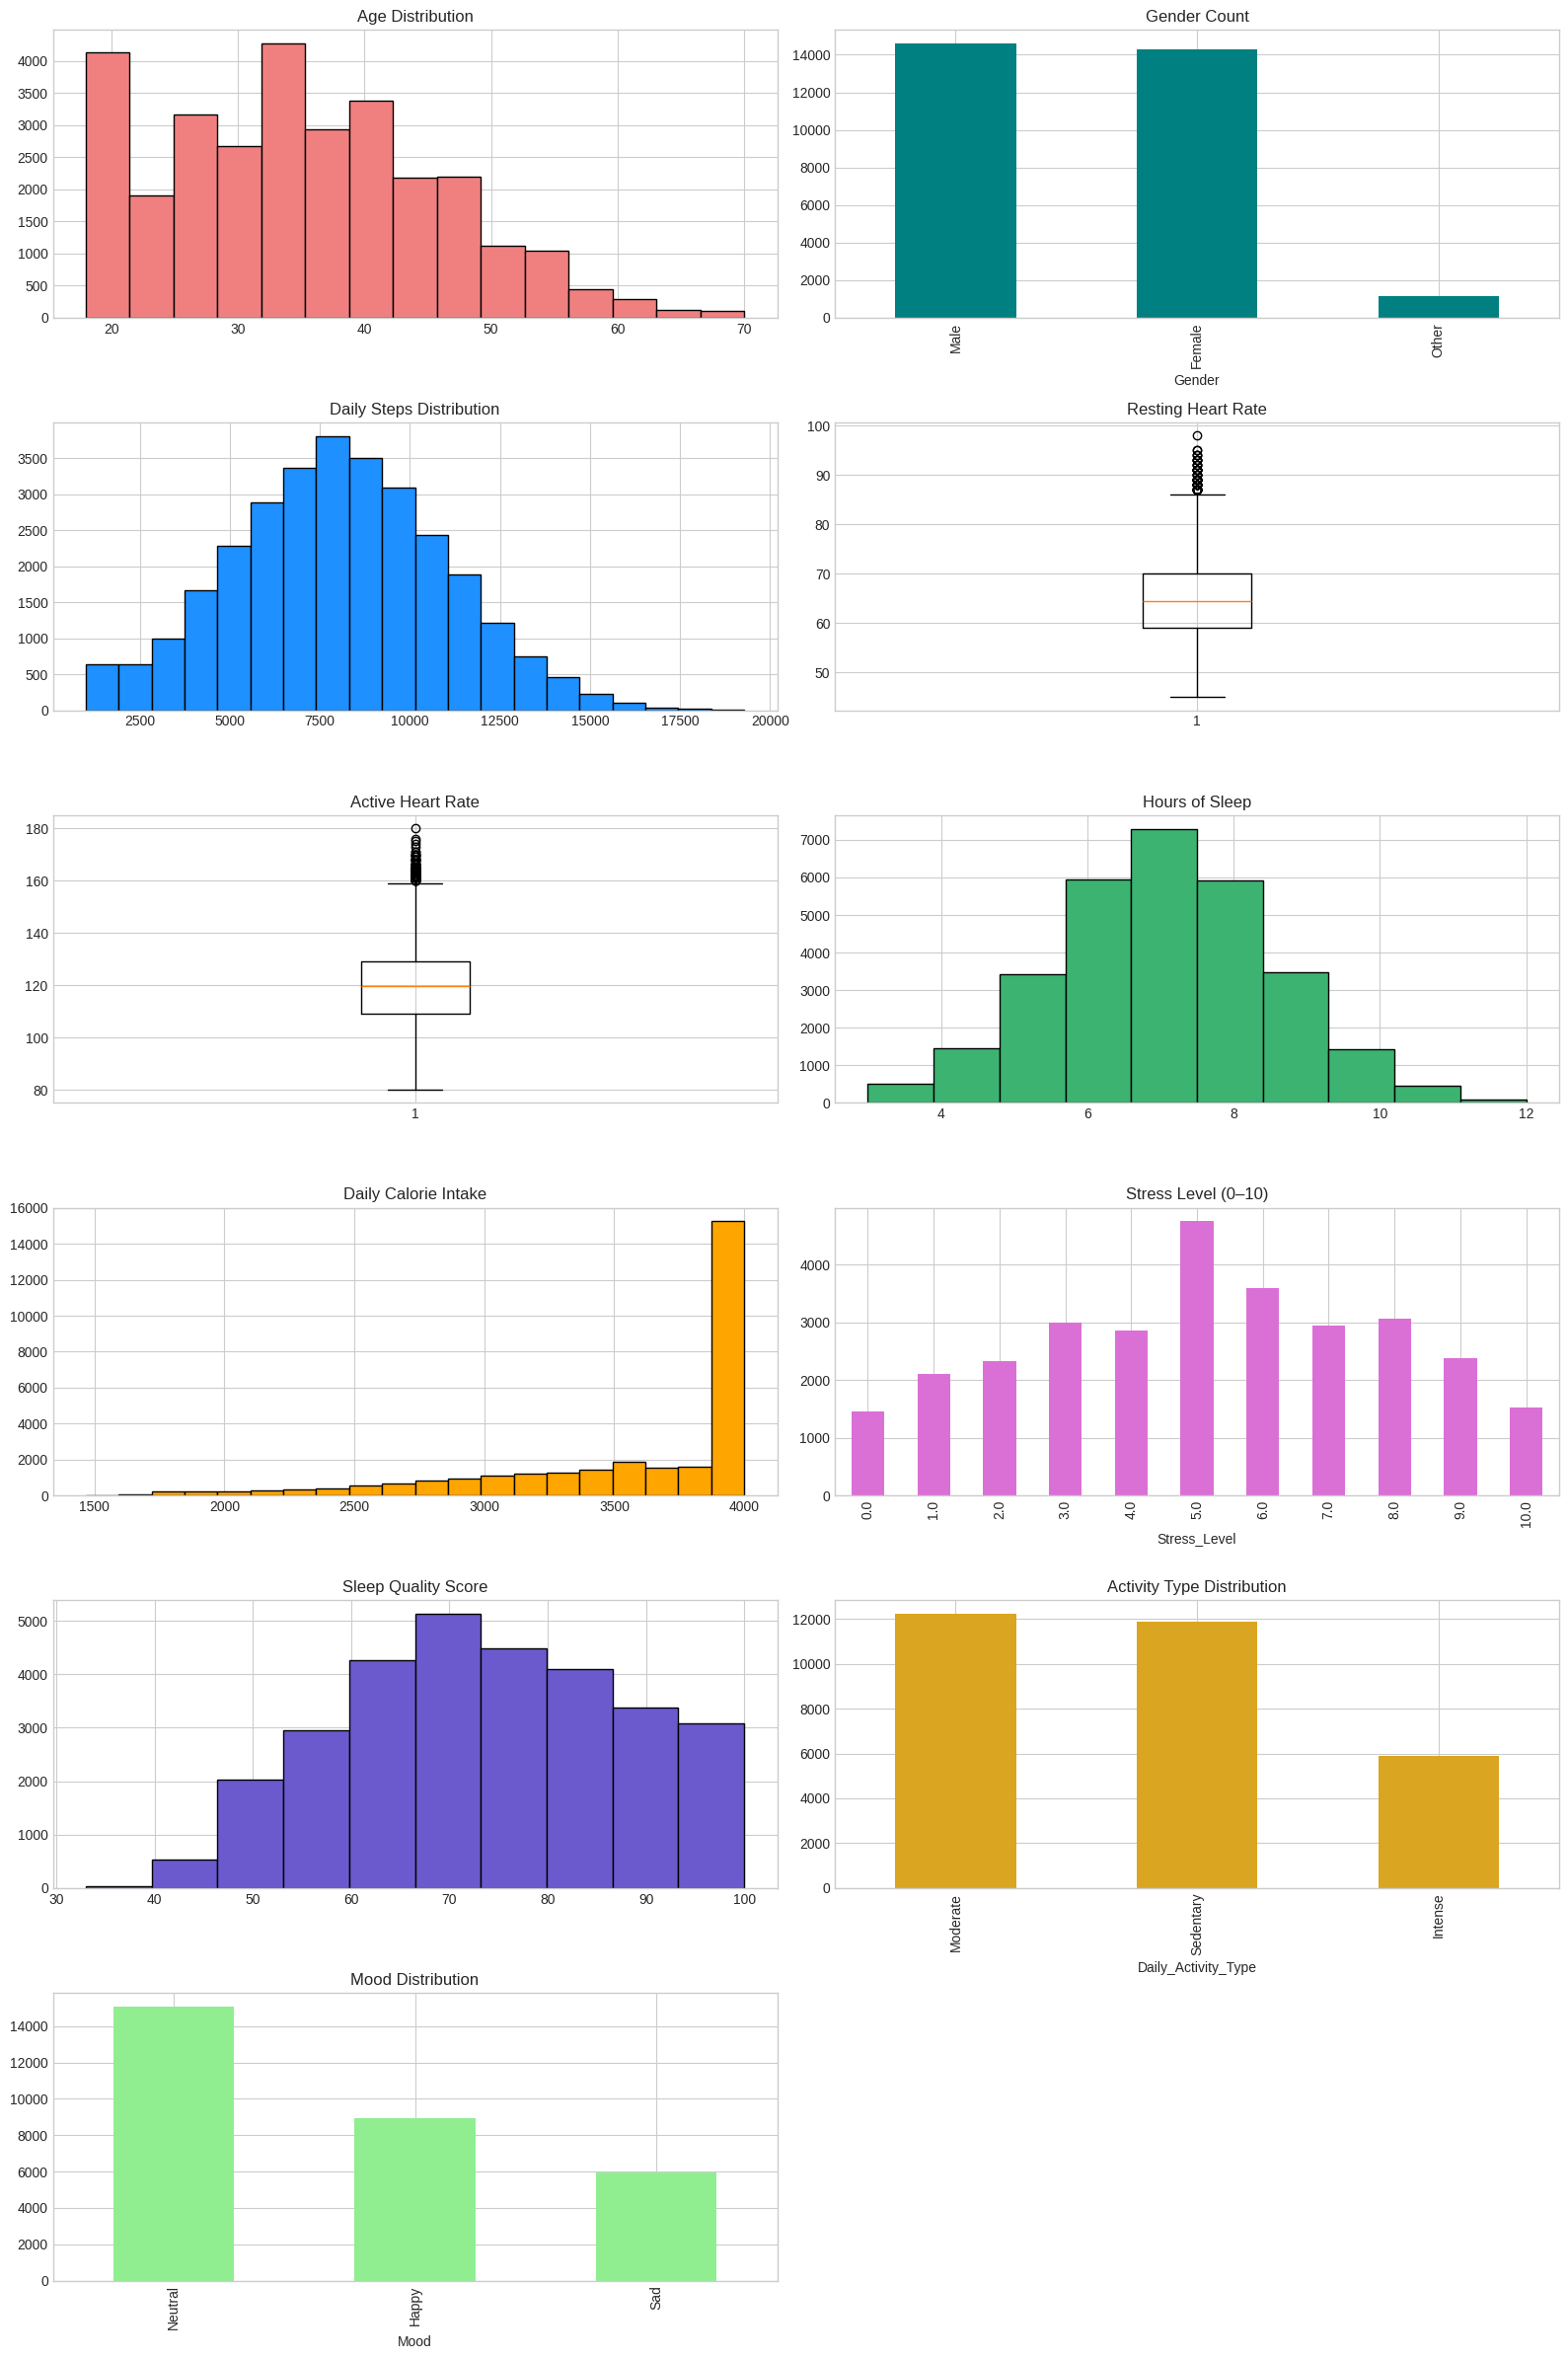

In [4]:
# Visualize the tracker data
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure and axes
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(16, 24))
axes = axes.flatten()

# Plot 1 - Age (histogram)
axes[0].hist(df['Age'], bins=15, color='lightcoral', edgecolor='black')
axes[0].set_title('Age Distribution')

# Plot 2 - Gender (bar plot)
df['Gender'].value_counts().plot(kind='bar', ax=axes[1], color='teal')
axes[1].set_title('Gender Count')

# Plot 3 - Daily Steps (histogram)
axes[2].hist(df['Daily_Steps'], bins=20, color='dodgerblue', edgecolor='black')
axes[2].set_title('Daily Steps Distribution')

# Plot 4 - Resting Heart Rate (boxplot)
axes[3].boxplot(df['Resting_Heart_Rate'])
axes[3].set_title('Resting Heart Rate')

# Plot 5 - Active Heart Rate (boxplot)
axes[4].boxplot(df['Active_Heart_Rate'])
axes[4].set_title('Active Heart Rate')

# Plot 6 - Hours of Sleep (histogram)
axes[5].hist(df['Hours_of_Sleep'], bins=10, color='mediumseagreen', edgecolor='black')
axes[5].set_title('Hours of Sleep')

# Plot 7 - Calorie Intake (histogram)
axes[6].hist(df['Daily_Calorie_Intake'], bins=20, color='orange', edgecolor='black')
axes[6].set_title('Daily Calorie Intake')

# Plot 8 - Stress Level (bar plot)
df['Stress_Level'].value_counts().sort_index().plot(kind='bar', ax=axes[7], color='orchid')
axes[7].set_title('Stress Level (0–10)')

# Plot 9 - Sleep Quality (histogram)
axes[8].hist(df['Sleep_Quality'], bins=10, color='slateblue', edgecolor='black')
axes[8].set_title('Sleep Quality Score')

# Plot 10 - Activity Type (bar plot)
df['Daily_Activity_Type'].value_counts().plot(kind='bar', ax=axes[9], color='goldenrod')
axes[9].set_title('Activity Type Distribution')

# Plot 11 - Mood (bar plot)
df['Mood'].value_counts().plot(kind='bar', ax=axes[10], color='lightgreen')
axes[10].set_title('Mood Distribution')

# Remove last unused subplot
fig.delaxes(axes[11])

# Adjust layout
plt.tight_layout()
plt.show()

Objective: Predict Hours of Sleep

Hypothesis (for Hours of Sleep):

H₀ (Null): There is no significant relationship between daily stress leval and hours of sleep

H₁ (Alternative): There is a significant relationship

We are testing whether features like daily steps or stress level predict hours of sleep.

Two-tailed test - Because we are open to the effect being either positive or negative (e.g., stress might increase or decrease sleep).

In [5]:
import statsmodels.api as sm

data = df[['Daily_Steps', 'Stress_Level', 'Hours_of_Sleep']]

# Define independent variables (X) and dependent variable (y)
X = data[['Daily_Steps', 'Stress_Level']]
y = data['Hours_of_Sleep']

# Add constant to X (for intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y,X).fit()

# View summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Hours_of_Sleep   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2475
Date:                Tue, 01 Jul 2025   Prob (F-statistic):              0.781
Time:                        18:37:26   Log-Likelihood:                -54358.
No. Observations:               30000   AIC:                         1.087e+05
Df Residuals:                   29997   BIC:                         1.087e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0187      0.029    238.233   

R² Score: 1.650093842742173e-05
R² Score: 1.650093842742173e-05
MSE: 2.1945317302855516


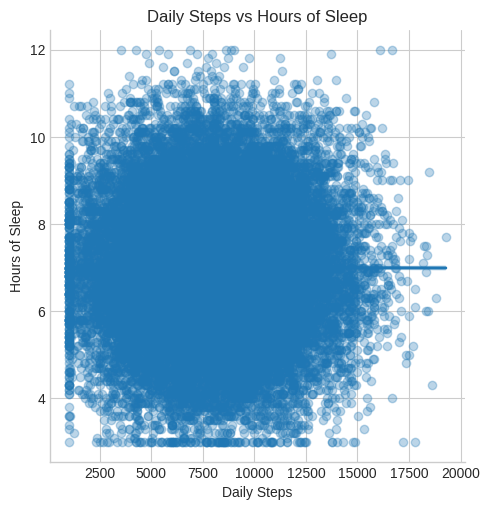

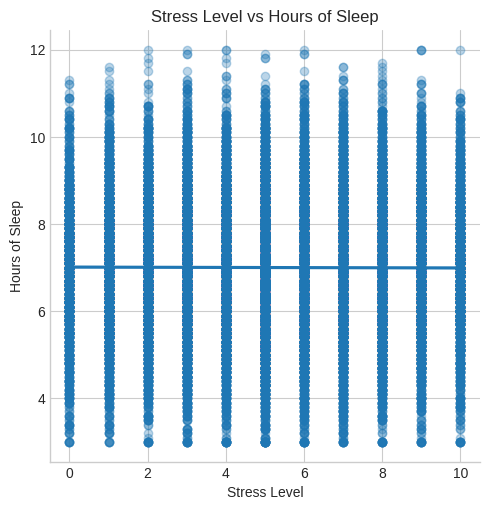

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
X = df[['Daily_Steps', 'Stress_Level']]
y = df['Hours_of_Sleep']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Evaluate the model
print("R² Score:", r2_score(y, y_pred))


# Predict
y_pred = model.predict(X)

# Evaluate the model
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Plot 1: Daily Steps vs Hours of Sleep
sns.lmplot(x='Daily_Steps', y='Hours_of_Sleep', data=df, scatter_kws={'alpha': 0.3})
plt.title('Daily Steps vs Hours of Sleep')
plt.xlabel('Daily Steps')
plt.ylabel('Hours of Sleep')
plt.show()

# Plot 2: Stress Level vs Hours of Sleep
sns.lmplot(x='Stress_Level', y='Hours_of_Sleep', data=df, scatter_kws={'alpha': 0.3})
plt.title('Stress Level vs Hours of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Hours of Sleep')
plt.show()


In [7]:
# Get all the correlation with sleep
import pandas as pd

# Correlation with sleep
correlations = df.corr(numeric_only=True)['Stress_Level'].sort_values(ascending=False)
print(correlations)


Stress_Level            1.000000
Active_Heart_Rate       0.004698
Daily_Calorie_Intake    0.000554
Resting_Heart_Rate     -0.000432
Daily_Steps            -0.003180
Hours_of_Sleep         -0.003622
Age                    -0.005106
Sleep_Quality          -0.931479
Name: Stress_Level, dtype: float64


**Hypothesis Testing**

Target (y): Sleep_Quality

Feature (x): Stress_Level

**Hypotheses:**

H₀ (Null Hypothesis): There is no significant linear relationship between stress level and sleep quality

H₁ (Alternative Hypothesis): There is significant linear relationship between stress level and sleep quality





In [8]:
import statsmodels.api as sm
import pandas as pd

# Define X and y
X = df[['Stress_Level']]
y = df['Sleep_Quality']

# Add constant (intercept term)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print summary for hypothesis test
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Sleep_Quality   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.967e+05
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        18:37:37   Log-Likelihood:                -92132.
No. Observations:               30000   AIC:                         1.843e+05
Df Residuals:                   29998   BIC:                         1.843e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           98.7707      0.064   1538.872   

Intercept: 98.77074211999255
Coefficient (Stress Level): -4.885263898452569
R² Score: 0.8676523263333935
MSE: 27.22915427708266


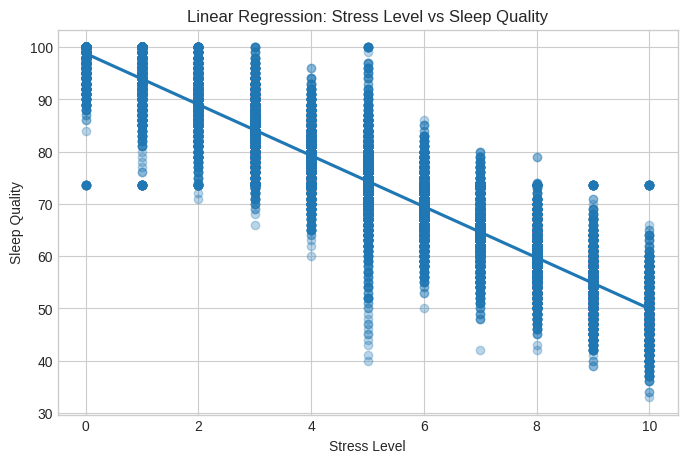

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
X = df[['Stress_Level']]
y = df['Sleep_Quality']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Print regression info
print("Intercept:", model.intercept_)
print("Coefficient (Stress Level):", model.coef_[0])
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Plot regression line
plt.figure(figsize=(8,5))
sns.regplot(x='Stress_Level', y='Sleep_Quality', data=df, scatter_kws={'alpha':0.3})
plt.title('Linear Regression: Stress Level vs Sleep Quality')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality')
plt.grid(True)
plt.show()


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Binary target: Well Rested
df['Well_Rested'] = (df['Hours_of_Sleep']>=5).astype(int)

# changing 7 to 6 hours of sleep: dont take extremes like 4 and 9 they give higher accuracy only to a particluar class: 0 or 1
# there are very few people above 9 and very few below 4

# Features and target
X = df[['Sleep_Quality','Stress_Level','Resting_Heart_Rate']]
y = df['Well_Rested']

# Scale features
# because all values are on different scale and we need to normalize them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a Regression
#
logreg =LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Results
print(classification_report(y_test,y_pred))

# 0: goodsleep 1: no good sleep: preciison: hopw many values correctly predicted,accuracy : 50%
# 1 thing could be bacause of parameneters

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       515
           1       0.91      1.00      0.96      5485

    accuracy                           0.91      6000
   macro avg       0.46      0.50      0.48      6000
weighted avg       0.84      0.91      0.87      6000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Binary target: Well Rested
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = df['Well_Rested']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM Classifier with RBF kernel
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.49      0.01      0.02      2933
           1       0.51      0.99      0.67      3067

    accuracy                           0.51      6000
   macro avg       0.50      0.50      0.35      6000
weighted avg       0.50      0.51      0.36      6000



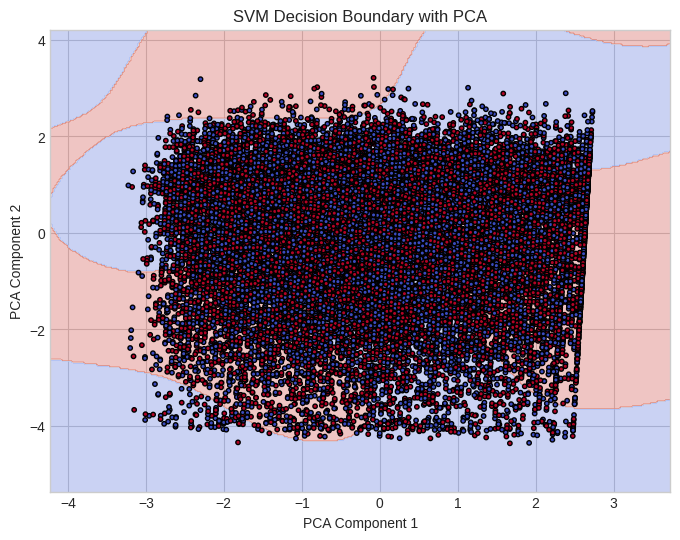

In [12]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = (df['Hours_of_Sleep'] >= 7).astype(int)  # Binary target

# Scale and reduce to 2D
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)

# Create meshgrid for decision surface
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
plt.title("SVM Decision Boundary with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [13]:
# What do we learn from this?
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Encode the target
le = LabelEncoder()
df['Activity_encoded'] = le.fit_transform(df['Daily_Activity_Type'])  # sedentary=0, moderate=1, intense=2

# Features that influence activity clearly
X = df[['Daily_Steps', 'Active_Heart_Rate', 'Daily_Calorie_Intake']]
y = df['Activity_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Results
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

     Intense       0.20      0.29      0.24      1200
    Moderate       0.41      0.44      0.42      2393
   Sedentary       0.40      0.28      0.33      2407

    accuracy                           0.35      6000
   macro avg       0.34      0.34      0.33      6000
weighted avg       0.36      0.35      0.35      6000



In [14]:
# Experimenting with Kernels
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Encode target labels (Daily_Activity_Type)
df['Daily_Activity_Type'] = df['Daily_Activity_Type'].str.strip().str.lower()
le = LabelEncoder()
df['Activity_Label'] = le.fit_transform(df['Daily_Activity_Type'])

print("Activity Type Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Step 2: Select relevant features and target
features = ['Daily_Calorie_Intake']
X = df[features]
y = df['Activity_Label']

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train SVM with different kernel
svm_model = SVC(kernel='rbf', class_weight='balanced')
#class weight balances: when u pick data of each kind make sure there is balanace b/w each class:(sedentary,intense, mode)
svm_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = svm_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Activity Type Mapping: {'intense': np.int64(0), 'moderate': np.int64(1), 'sedentary': np.int64(2)}

Classification Report:

              precision    recall  f1-score   support

     intense       0.18      0.21      0.19      1176
    moderate       0.40      0.57      0.47      2445
   sedentary       0.39      0.20      0.27      2379

    accuracy                           0.35      6000
   macro avg       0.33      0.33      0.31      6000
weighted avg       0.36      0.35      0.34      6000



In [15]:
# Experimenting with Kernels
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Encode target labels (Daily_Activity_Type)
df['Daily_Activity_Type'] = df['Daily_Activity_Type'].str.strip().str.lower()
le = LabelEncoder()
df['Activity_Label'] = le.fit_transform(df['Daily_Activity_Type'])

print("Activity Type Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Step 2: Select relevant features and target
features = ['Daily_Calorie_Intake']
X = df[features]
y = df['Activity_Label']

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train SVM with different kernel
svm_model = SVC(kernel='sigmoid', class_weight='balanced')
# sigmoid only works for 2 classes hence it can't classify well on 3 classes recall for sedentart: is 0.0
# no need to fit rbf because it is widely used,
#class weight balances: when u pick data of each kind make sure there is balanace b/w each class:(sedentary,intense, mode)
svm_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = svm_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Activity Type Mapping: {'intense': np.int64(0), 'moderate': np.int64(1), 'sedentary': np.int64(2)}

Classification Report:

              precision    recall  f1-score   support

     intense       0.20      0.71      0.31      1176
    moderate       0.40      0.29      0.34      2445
   sedentary       0.33      0.00      0.00      2379

    accuracy                           0.26      6000
   macro avg       0.31      0.33      0.22      6000
weighted avg       0.34      0.26      0.20      6000



In [16]:
# Experimenting with Kernels
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 1: Encode target labels (Daily_Activity_Type)
df['Daily_Activity_Type'] = df['Daily_Activity_Type'].str.strip().str.lower()
le = LabelEncoder()
df['Activity_Label'] = le.fit_transform(df['Daily_Activity_Type'])

print("Activity Type Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Step 2: Select relevant features and target
features = ['Daily_Calorie_Intake']
X = df[features]
y = df['Activity_Label']

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Train SVM with different kernel
svm_model = SVC(kernel='linear', class_weight='balanced')
# sigmoid only works for 2 classes hence it can't classify well on 3 classes recall for sedentart: is 0.0
# no need to fit rbf because it is widely used, since data is linearly separable: we can go with simple: linear
#class weight balances: when u pick data of each kind make sure there is balanace b/w each class:(sedentary,intense, mode)
svm_model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = svm_model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Activity Type Mapping: {'intense': np.int64(0), 'moderate': np.int64(1), 'sedentary': np.int64(2)}

Classification Report:

              precision    recall  f1-score   support

     intense       0.21      0.02      0.04      1176
    moderate       0.41      0.86      0.56      2445
   sedentary       0.42      0.13      0.20      2379

    accuracy                           0.41      6000
   macro avg       0.35      0.34      0.27      6000
weighted avg       0.38      0.41      0.31      6000



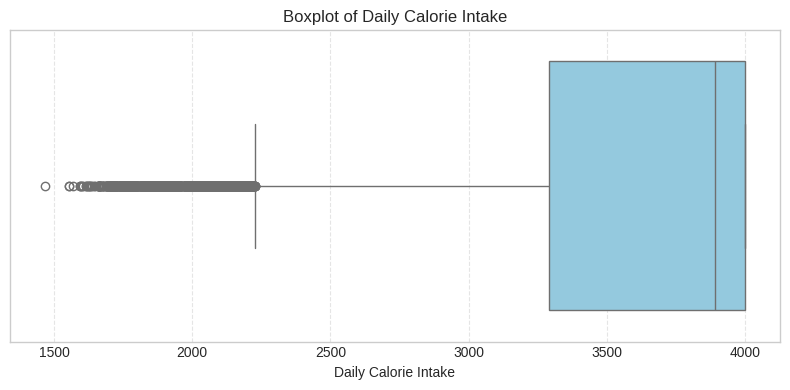

In [17]:
# Understanding Daily Calorie Intake
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x='Daily_Calorie_Intake', data=df, color='skyblue')


plt.title('Boxplot of Daily Calorie Intake')
plt.xlabel('Daily Calorie Intake')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


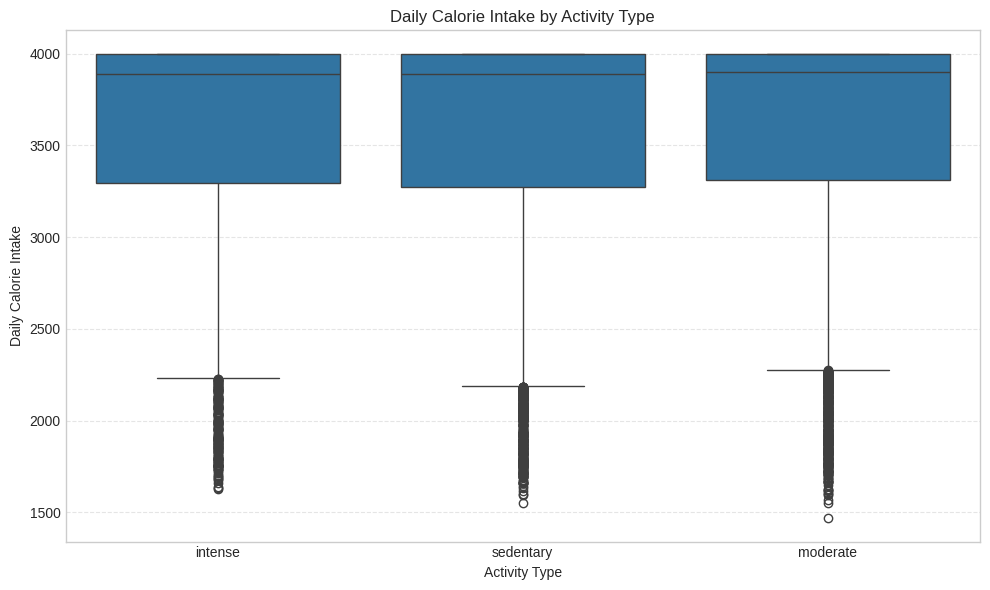

In [18]:
# Mapping to daily activities

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Daily_Activity_Type', y='Daily_Calorie_Intake', data=df)

plt.title('Daily Calorie Intake by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Daily Calorie Intake')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


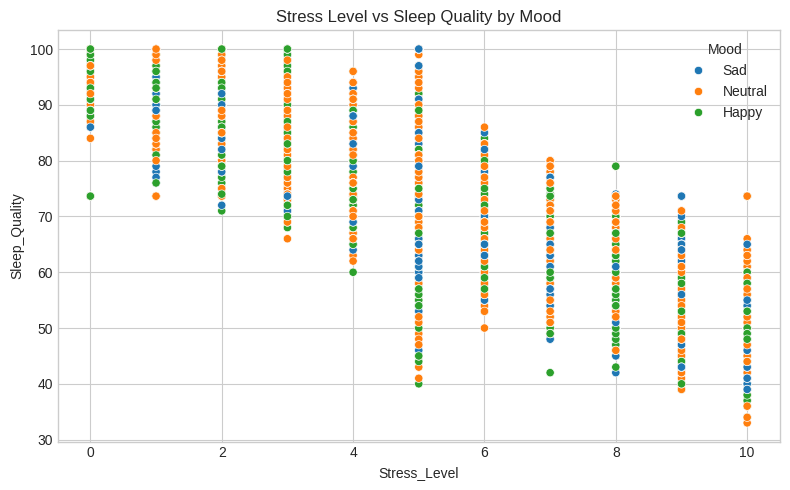

In [19]:
# Stress Level and Sleep Quality
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Stress_Level',y='Sleep_Quality',hue='Mood', data=df)
#change the colour based on mood: (hue)
plt.title('Stress Level vs Sleep Quality by Mood')
plt.grid(True)
plt.tight_layout()
plt.show()


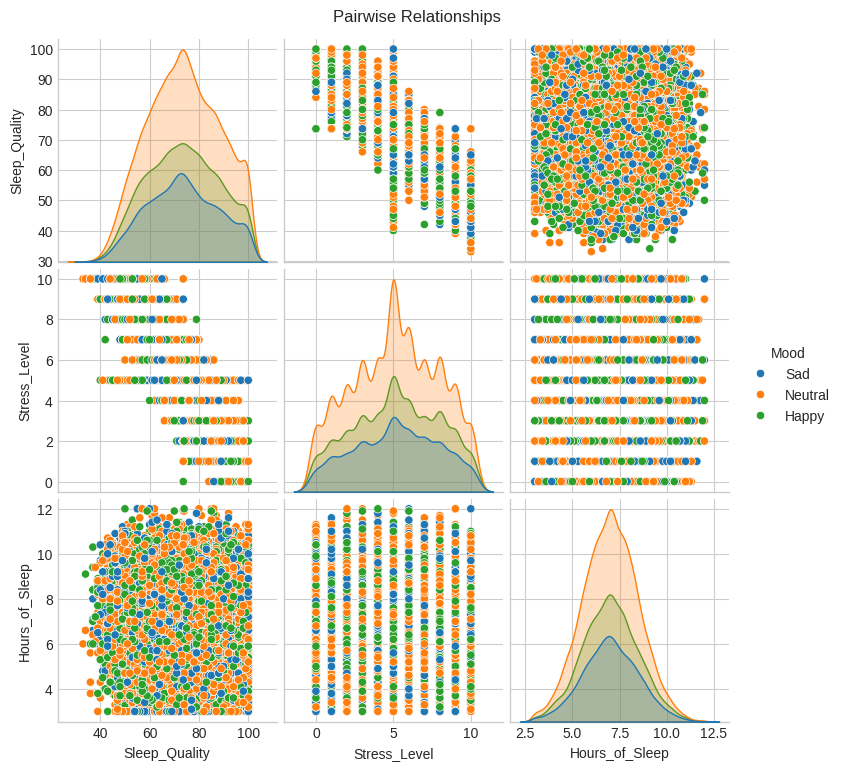

In [20]:
# Pair Plots
sns.pairplot(df[['Sleep_Quality', 'Stress_Level', 'Hours_of_Sleep', 'Mood']], hue='Mood')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


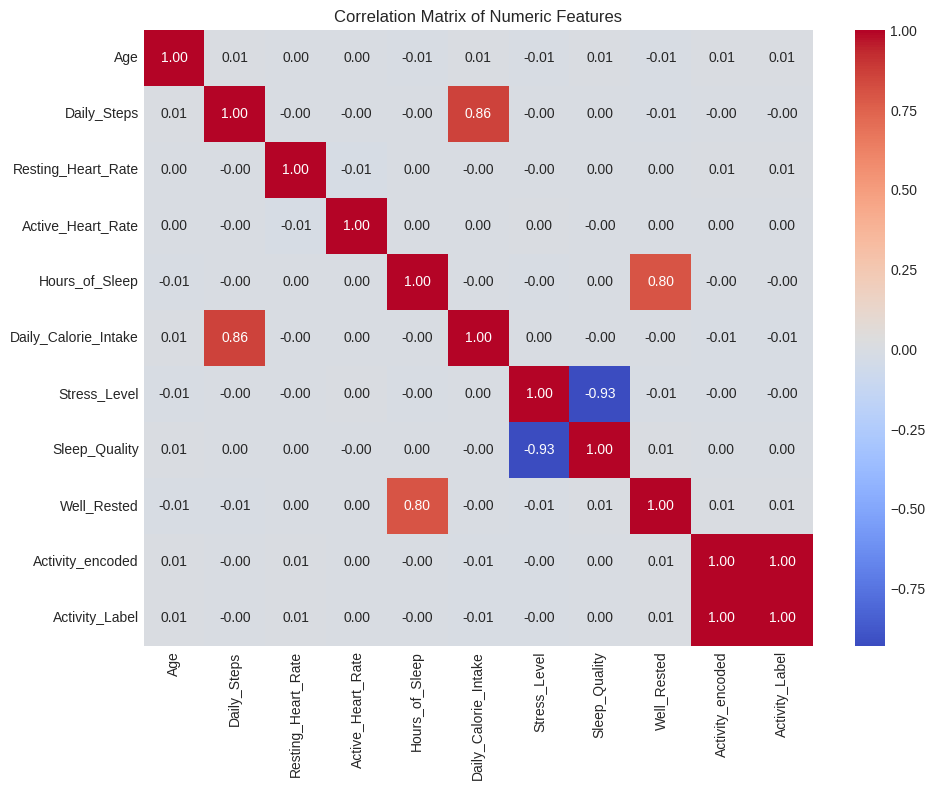

In [21]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


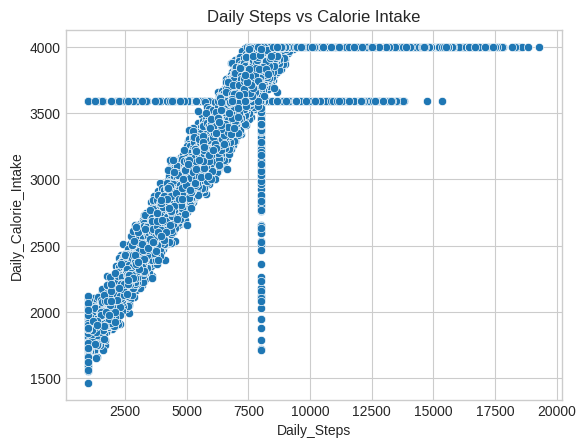

In [22]:
sns.scatterplot(x='Daily_Steps',y='Daily_Calorie_Intake', data=df)
plt.title('Daily Steps vs Calorie Intake')
plt.show()

Silhouette Score: 0.33


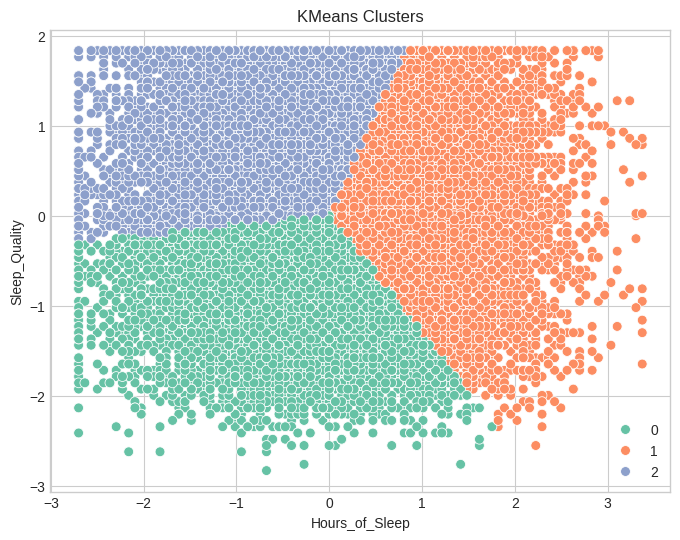

In [23]:
# Applying k-means

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features
#features = ['Hours_of_Sleep', 'Sleep_Quality', 'Stress_Level']
features = ['Hours_of_Sleep', 'Sleep_Quality']
X = df[features]

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 4: Silhouette score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.2f}")

# Step 5: Visualize first two features (as a simple projection)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', s=50)
plt.title("KMeans Clusters")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()


Silhouette Score: 0.32


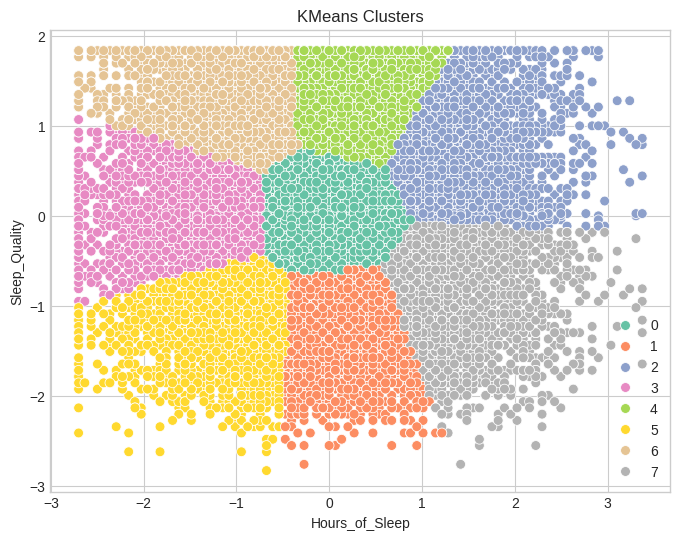

In [24]:
# Applying k-means

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select features
#features = ['Hours_of_Sleep', 'Sleep_Quality', 'Stress_Level']
features = ['Hours_of_Sleep', 'Sleep_Quality']
X = df[features]

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans
#kmeans = KMeans(n_clusters=7, random_state=42)
kmeans = KMeans(n_clusters=8, random_state=9)
labels = kmeans.fit_predict(X_scaled)

# Step 4: Silhouette score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.2f}")

# Step 5: Visualize first two features (as a simple projection)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', s=50)
plt.title("KMeans Clusters")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()

# low silloute score: clustering could be better,
# suppose we want to create medical reforms for targeted groups: kmeans can be good choice
#0.3 is not a bad score its in between

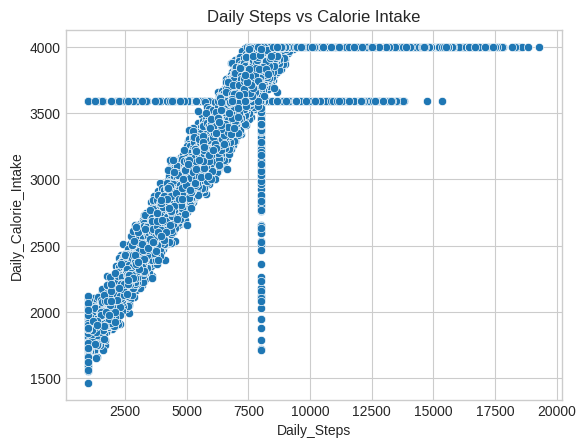

In [25]:
sns.scatterplot(x='Daily_Steps',y='Daily_Calorie_Intake', data=df)
plt.title('Daily Steps vs Calorie Intake')
plt.show()


DBSCAN found 5 clusters and 1403 noise points


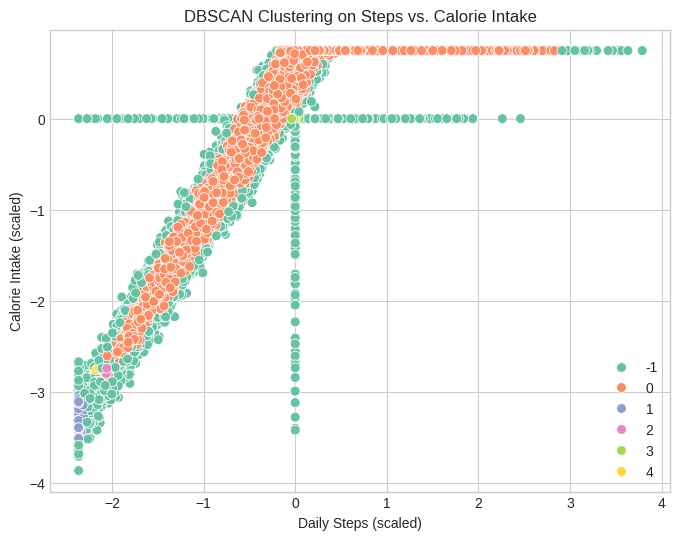

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Select features
X = df[['Daily_Steps', 'Daily_Calorie_Intake']]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
db = DBSCAN(eps=0.04, min_samples=20)
#if samples are less than 20 say 15 : then points will be outliers
# as eps value reduces noises increase, because the distance between cetroid and other points is becoming less
# when we decrease min_sample size: the noise increases no of clusters also increase
labels = db.fit_predict(X_scaled)

# Count noise points
n_noise = sum(labels == -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points")

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2', legend='full', s=50)
plt.title("DBSCAN Clustering on Steps vs. Calorie Intake")
plt.xlabel("Daily Steps (scaled)")
plt.ylabel("Calorie Intake (scaled)")
plt.grid(True)
plt.show()


When to use the respective metrics

| Metric    | Best For                              |
| --------- | ------------------------------------- |
| Accuracy  | Balanced classes, equal error cost    |
| Precision | False positives are worse (be exact)  |
| Recall    | False negatives are worse (catch all) |
| F1 Score  | Balance when classes are imbalanced   |



              precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.98      1.00      0.99      5861

    accuracy                           0.98      6000
   macro avg       0.49      0.50      0.49      6000
weighted avg       0.95      0.98      0.97      6000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


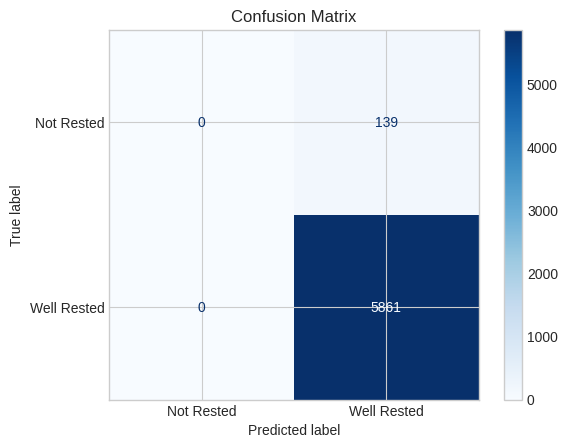

In [27]:
# lets us balance it!

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create binary label: Well Rested
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 4).astype(int)

# Select features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = df['Well_Rested']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification report (optional)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 5861 are truly predicted  139 predicted

# why did we get only 6k values when there are 30k points in excel, its 6k because 6k is test data, data is heavily unbalanced
# when we have inbalanced go for f1 but here only for class 1 its coming good
# you go for accuracy only when imbalance3d


              precision    recall  f1-score   support

           0       0.03      0.53      0.05       139
           1       0.98      0.55      0.71      5861

    accuracy                           0.55      6000
   macro avg       0.50      0.54      0.38      6000
weighted avg       0.96      0.55      0.69      6000



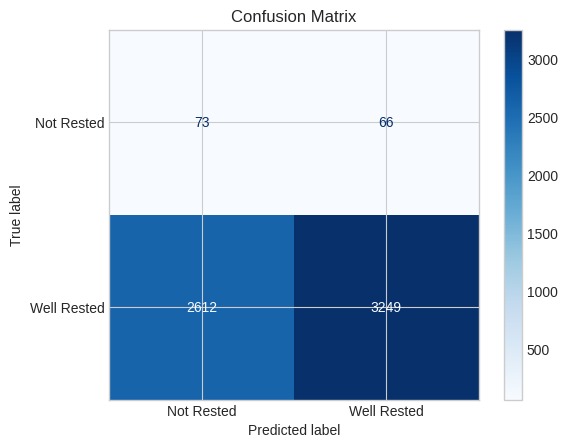

In [28]:
# lets us balance it!

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create binary label: Well Rested
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 4).astype(int)

# Select features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = df['Well_Rested']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Classification report (optional)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 5861 are truly predicted  139 predicted

# why did we get only 6k values when there are 30k points in excel, its 6k because 6k is test data, data is heavily unbalanced
# when we have inbalanced go for f1 but here only for class 1 its coming good
# you go for accuracy only when imbalance3d


the score is changed based on the data we take, can we randomly take more sets and take avg of f1score

In [29]:
# Do we need a cross validation?

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define features and target
X = df[['Sleep_Quality', 'Stress_Level', 'Daily_Steps', 'Daily_Calorie_Intake']]
y = (df['Hours_of_Sleep'] >= 7).astype(int)  # Binary target: Well Rested

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
#model = LogisticRegression(class_weight='balanced')
model = LogisticRegression()
# Perform 5-fold cross-validation
f1_scores =cross_val_score(model, X_scaled, y, cv=5, scoring='f1')

# take 5 diff set of partitons do cross valisation 5 times , and give avg of f1

# Print scores
print("F1 Scores (5-Fold):", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))


F1 Scores (5-Fold): [0.68205297 0.68189807 0.67976598 0.68218757 0.68233227]
Mean F1 Score: 0.6816473717475324


Accuracy: 0.5111666666666667
Precision: 0.5111666666666667
Recall: 1.0
F1 Score: 0.67651924561597
ROC AUC Score: 0.5051245560146611
[[   0 2933]
 [   0 3067]]


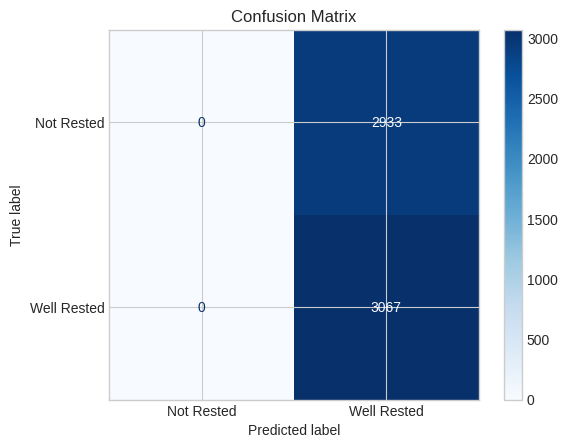

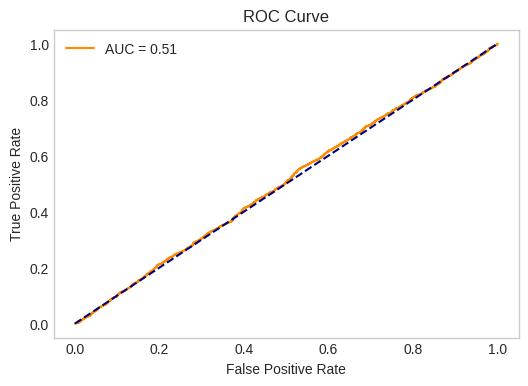

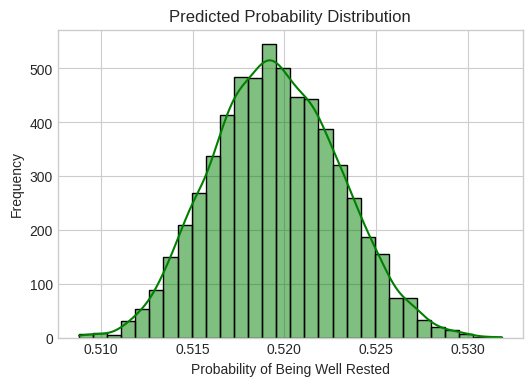

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Target already defined
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Feature selection
features = ['Sleep_Quality', 'Stress_Level','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Probability distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=30, kde=True, color='green')
plt.title("Predicted Probability Distribution")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Frequency")
plt.show()


Accuracy: 0.5045
Precision: 0.5156146179401994
Recall: 0.5060319530485817
F1 Score: 0.5107783445779167
ROC AUC Score: 0.5049218993784789
[[1475 1458]
 [1515 1552]]


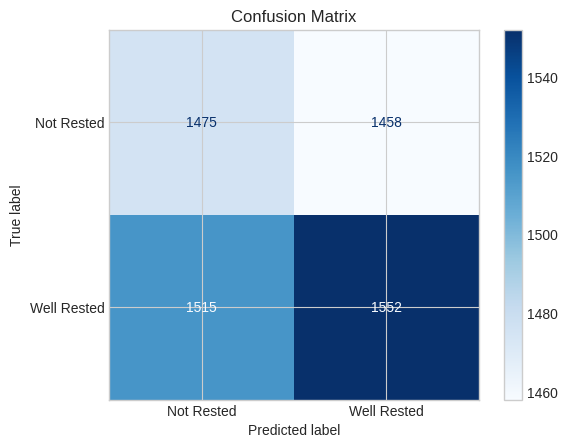

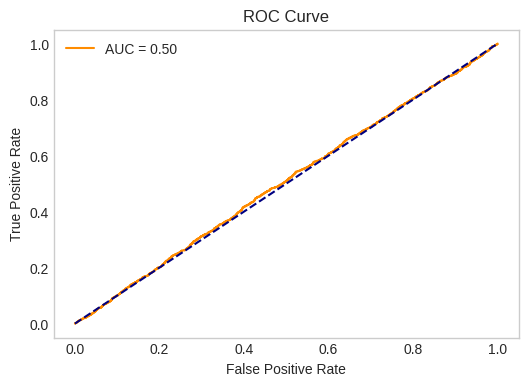

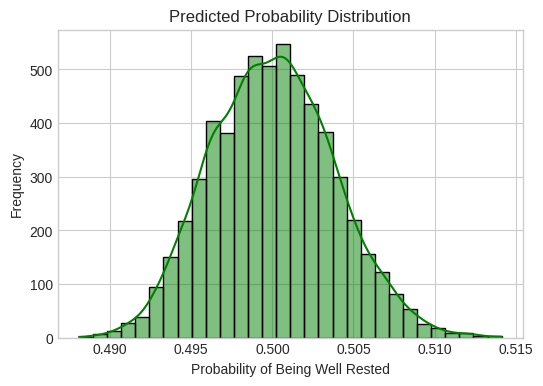

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Target already defined
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Feature selection
features = ['Sleep_Quality', 'Stress_Level','Daily_Calorie_Intake','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Probability distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=30, kde=True, color='green')
plt.title("Predicted Probability Distribution")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Frequency")
plt.show()


Epoch 0, Loss: 0.7118
Epoch 10, Loss: 0.6983
Epoch 20, Loss: 0.6933
Epoch 30, Loss: 0.6925
Epoch 40, Loss: 0.6925
Epoch 50, Loss: 0.6924
Epoch 60, Loss: 0.6924
Epoch 70, Loss: 0.6924
Epoch 80, Loss: 0.6924
Epoch 90, Loss: 0.6924

Evaluation Metrics:
Accuracy: 0.5111666666666667
Precision: 0.5111666666666667
Recall: 1.0
F1 Score: 0.67651924561597
ROC AUC Score: 0.504874875924225


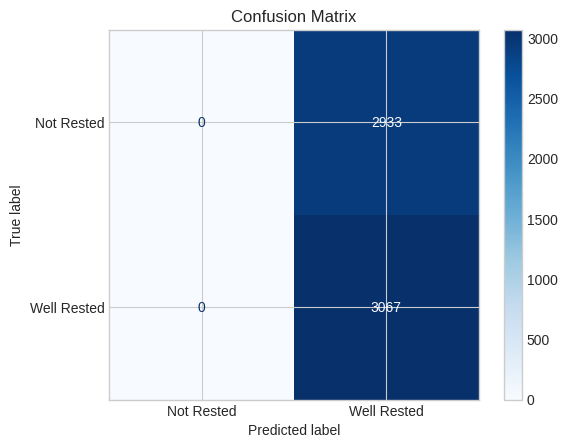

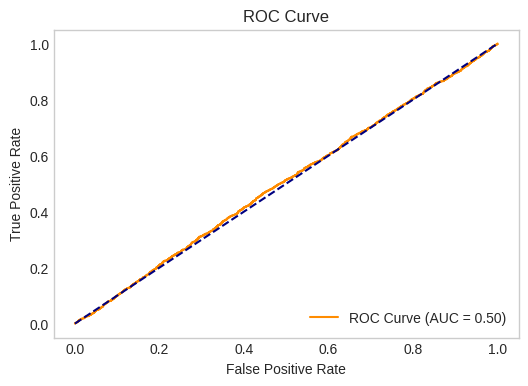

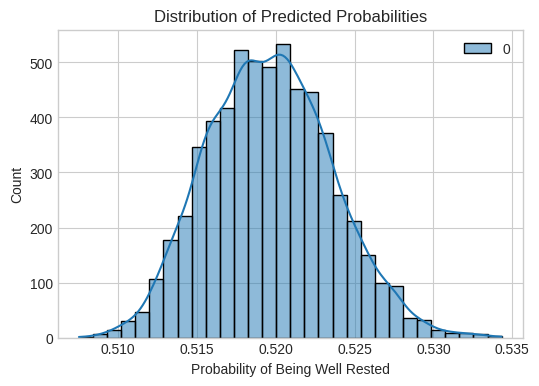

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve
)

# Define target
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Features
features =['Sleep_Quality', 'Stress_Level','Daily_Calorie_Intake','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Torch tensors
# we are converting to tensor data structure: which are nothing but vectors where our operations become easy
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Model with 5 input features
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(5, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

model = Perceptron()
criterion = nn.BCELoss() # for binary classification
# if we want to customize weights for each layer,
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test)
    y_pred = (y_pred_prob >= 0.5).float()

# Convert to numpy
y_true = y_test.numpy()
y_pred_np = y_pred.numpy()
y_prob_np = y_pred_prob.numpy()

# Metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred_np))
print("Precision:", precision_score(y_true, y_pred_np))
print("Recall:", recall_score(y_true, y_pred_np))
print("F1 Score:", f1_score(y_true, y_pred_np))
print("ROC AUC Score:", roc_auc_score(y_true, y_prob_np))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob_np)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc_score(y_true, y_prob_np):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Probability Histogram
plt.figure(figsize=(6, 4))
sns.histplot(y_prob_np, bins=30, kde=True, color='purple')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Count")
plt.show()


Epoch 0, Loss: 0.6980
Epoch 10, Loss: 0.6924
Epoch 20, Loss: 0.6921
Epoch 30, Loss: 0.6919
Epoch 40, Loss: 0.6918
Epoch 50, Loss: 0.6917
Epoch 60, Loss: 0.6915
Epoch 70, Loss: 0.6913
Epoch 80, Loss: 0.6910
Epoch 90, Loss: 0.6906

Evaluation Metrics:
Accuracy: 0.5095
Precision: 0.511881947106171
Recall: 0.8708835996087382
F1 Score: 0.6447797223898611
ROC AUC Score: 0.5072345528786525


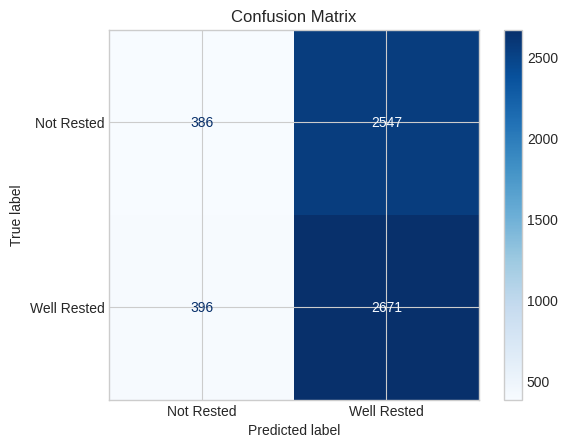

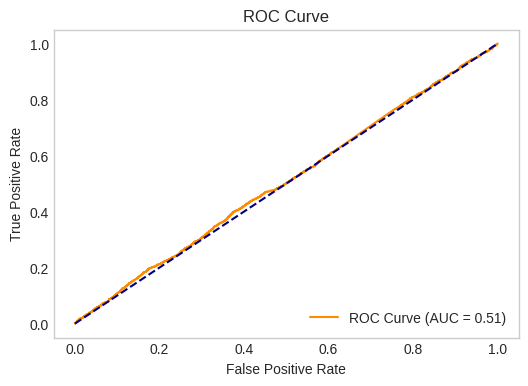

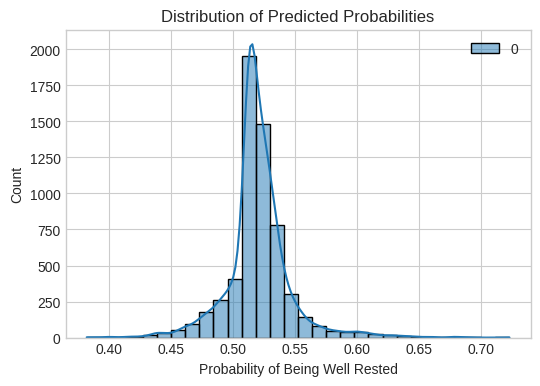

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)

# You already have df and missing values are filled
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Use new feature set
features = ['Sleep_Quality', 'Stress_Level','Daily_Calorie_Intake','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Neural Network model with ReLU and hidden layers
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 32),
            # 1st hidden layer has 32
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()

        )

    def forward(self, x):
        return self.net(x)

model = NNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test)
    y_pred = (y_pred_prob >= 0.5).float()

# Convert to numpy
y_true = y_test.numpy()
y_pred_np = y_pred.numpy()
y_prob_np = y_pred_prob.numpy()

# Metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred_np))
print("Precision:", precision_score(y_true, y_pred_np))
print("Recall:", recall_score(y_true, y_pred_np))
print("F1 Score:", f1_score(y_true, y_pred_np))
print("ROC AUC Score:", roc_auc_score(y_true, y_prob_np))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob_np)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc_score(y_true, y_prob_np):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Probability Distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob_np, bins=30, kde=True, color='purple')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Count")
plt.show()


Ask Chatgpt to summarize  i ran a model these are 3 models and these are the models results give me a comparison table, no matter what  we did the accuracy is still the same

**Comparison of three models: Logistic, Perceptron, and Deep Neural Network:**


## Model Performance Comparison

| Metric           | Logistic Regression | Perceptron (Single-Layer NN) | Deep Neural Network |
|------------------|---------------------|-------------------------------|---------------------|
| **Accuracy**     | 0.5045              | 0.5112                        | 0.5095              |
| **Precision**    | 0.5156              | 0.5112                        | 0.5119              |
| **Recall**       | 0.5060              | 1.0000                        | 0.8709              |
| **F1 Score**     | 0.5108              | 0.6765                        | 0.6448              |
| **ROC AUC**      | 0.5049              | 0.5049                        | 0.5072              |
| **Confusion Matrix** | [[1475 1458], [1515 1552]] | - | - |

**Key Insights:**
- The **Perceptron** achieved perfect recall but at the cost of lower precision, likely predicting mostly the positive class.
- The **Deep Neural Network** shows a more balanced trade-off between precision and recall, resulting in a strong F1 score.
- **Logistic Regression** performed the weakest across most metrics, particularly in recall and F1 score.





Epoch 0, Loss: 0.7012
Epoch 10, Loss: 0.4267
Epoch 20, Loss: 0.1304
Epoch 30, Loss: 0.0561
Epoch 40, Loss: 0.0355
Epoch 50, Loss: 0.0266
Epoch 60, Loss: 0.0217
Epoch 70, Loss: 0.0184
Epoch 80, Loss: 0.0157
Epoch 90, Loss: 0.0136

Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


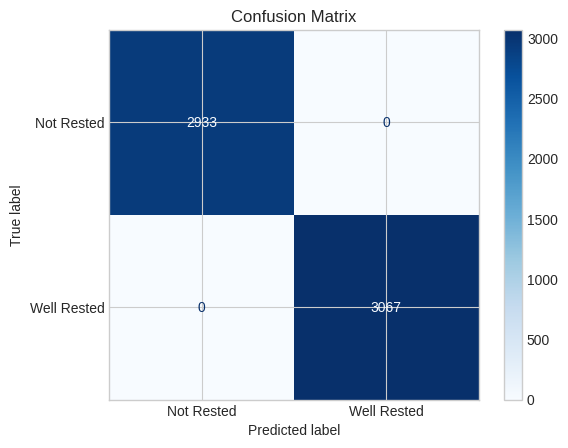

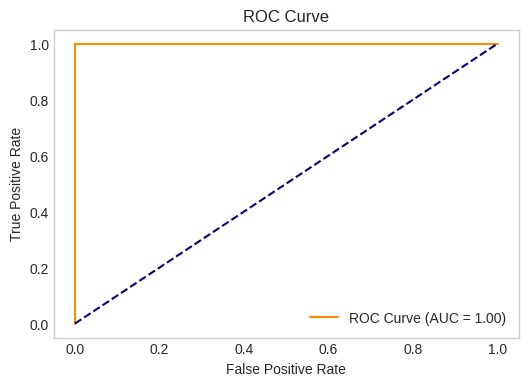

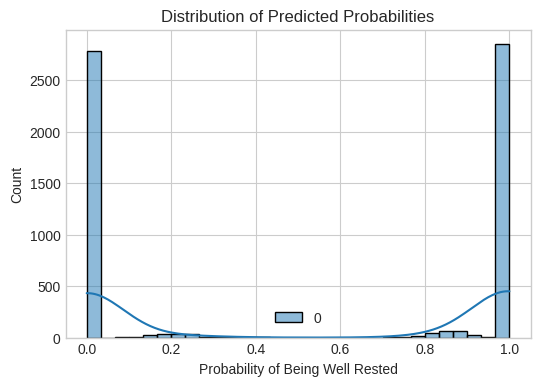

In [42]:
# This analysis gives perfect ROC but the features should not have the parameter that was used to create dependednt variable y
# Target valus is prepared using hours_of_sleep so model will give higher weightage to it, hence the model performs better but this is not a good analysis
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)

# You already have df and missing values are filled
df['Well_Rested'] = (df['Hours_of_Sleep'] >= 7).astype(int)

# Use new feature set
features = ['Sleep_Quality', 'Stress_Level','Daily_Calorie_Intake','Active_Heart_Rate','Resting_Heart_Rate','Hours_of_Sleep']

# adding hours of sleep : target value added in features
X = df[features].values
y = df['Well_Rested'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Neural Network model with ReLU and hidden layers
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(6, 32),
            # 1st hidden layer has 32
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()

        )

    def forward(self, x):
        return self.net(x)

model = NNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test)
    y_pred = (y_pred_prob >= 0.5).float()

# Convert to numpy
y_true = y_test.numpy()
y_pred_np = y_pred.numpy()
y_prob_np = y_pred_prob.numpy()

# Metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred_np))
print("Precision:", precision_score(y_true, y_pred_np))
print("Recall:", recall_score(y_true, y_pred_np))
print("F1 Score:", f1_score(y_true, y_pred_np))
print("ROC AUC Score:", roc_auc_score(y_true, y_prob_np))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob_np)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc_score(y_true, y_prob_np):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Probability Distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob_np, bins=30, kde=True, color='purple')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Count")
plt.show()


Accuracy: 0.8728333333333333
Precision: 0.8409321175278622
Recall: 0.895039539899353
F1 Score: 0.8671426083928261
ROC AUC Score: 0.9578811493043935
[[2747  471]
 [ 292 2490]]


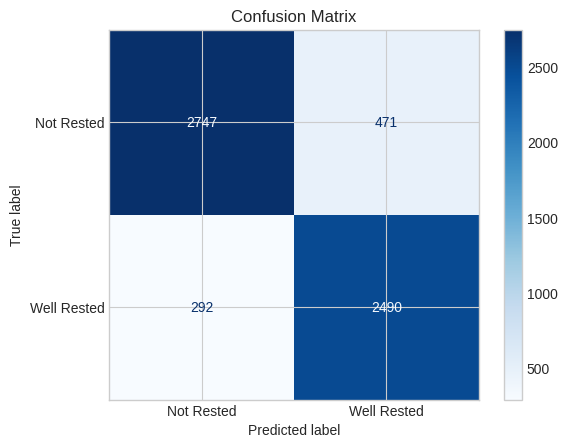

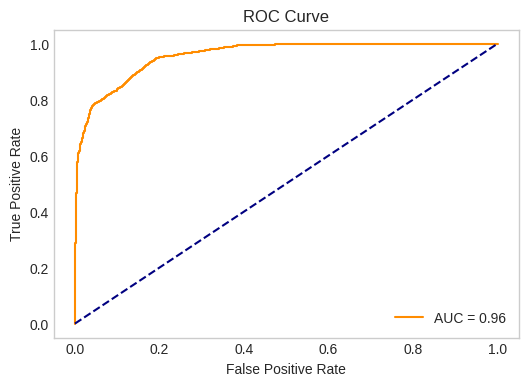

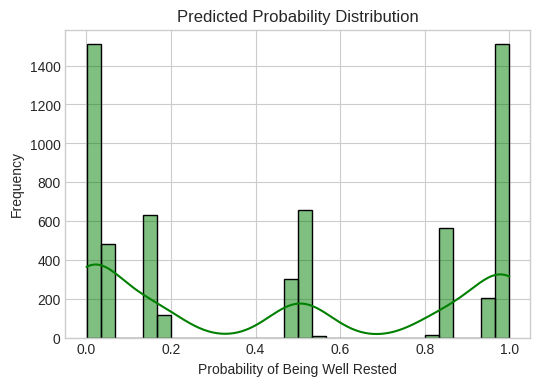

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Target already defined
df['Well_Rested'] = (df['Sleep_Quality'] >= 75).astype(int)

# Feature selection
features = ['Hours_of_Sleep', 'Stress_Level','Daily_Calorie_Intake','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

# Probability distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=30, kde=True, color='green')
plt.title("Predicted Probability Distribution")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Frequency")
plt.show()


take up all related things and explore the relation


Epoch 0, Loss: 0.6395
Epoch 10, Loss: 0.5760
Epoch 20, Loss: 0.5270
Epoch 30, Loss: 0.4917
Epoch 40, Loss: 0.4659
Epoch 50, Loss: 0.4454
Epoch 60, Loss: 0.4280
Epoch 70, Loss: 0.4130
Epoch 80, Loss: 0.3997
Epoch 90, Loss: 0.3880

Evaluation Metrics:
Accuracy: 0.8751666666666666
Precision: 0.943692710606722
Recall: 0.7771387491013659
F1 Score: 0.8523556081214272
ROC AUC Score: 0.9576903640959216


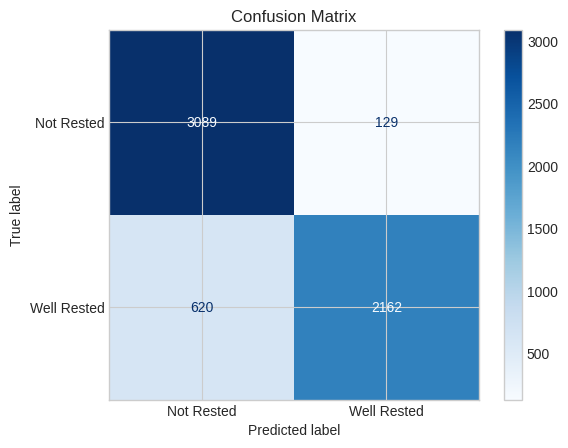

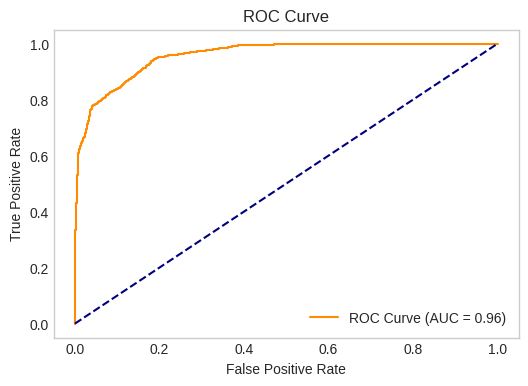

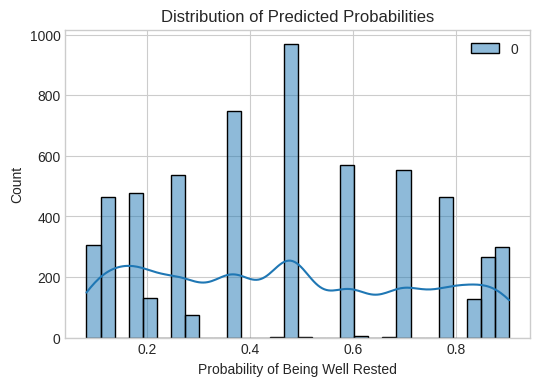

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve
)

# Define target
df['Well_Rested'] = (df['Sleep_Quality'] >= 75).astype(int)

# Features
features =['Hours_of_Sleep','Daily_Calorie_Intake', 'Stress_Level','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Torch tensors
# we are converting to tensor data structure: which are nothing but vectors where our operations become easy
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Model with 5 input features
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(5, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

model = Perceptron()
criterion = nn.BCELoss() # for binary classification
# if we want to customize weights for each layer,
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test)
    y_pred = (y_pred_prob >= 0.5).float()

# Convert to numpy
y_true = y_test.numpy()
y_pred_np = y_pred.numpy()
y_prob_np = y_pred_prob.numpy()

# Metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred_np))
print("Precision:", precision_score(y_true, y_pred_np))
print("Recall:", recall_score(y_true, y_pred_np))
print("F1 Score:", f1_score(y_true, y_pred_np))
print("ROC AUC Score:", roc_auc_score(y_true, y_prob_np))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob_np)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc_score(y_true, y_prob_np):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Probability Histogram
plt.figure(figsize=(6, 4))
sns.histplot(y_prob_np, bins=30, kde=True, color='purple')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Count")
plt.show()


Epoch 0, Loss: 0.7095
Epoch 10, Loss: 0.4482
Epoch 20, Loss: 0.2503
Epoch 30, Loss: 0.2518
Epoch 40, Loss: 0.2422
Epoch 50, Loss: 0.2388
Epoch 60, Loss: 0.2377
Epoch 70, Loss: 0.2369
Epoch 80, Loss: 0.2365
Epoch 90, Loss: 0.2363

Evaluation Metrics:
Accuracy: 0.8715
Precision: 0.8775816748028539
Recall: 0.8400431344356578
F1 Score: 0.8584022038567493
ROC AUC Score: 0.9580675223256672


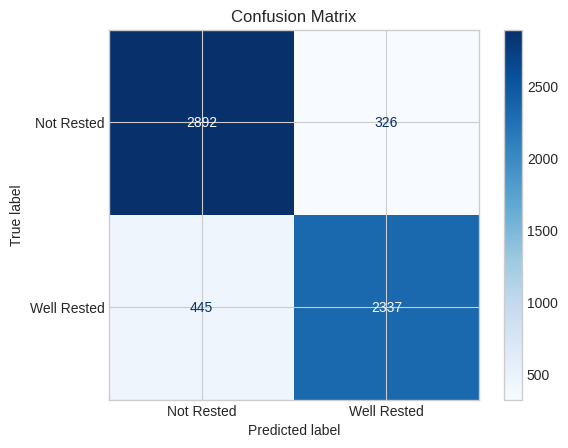

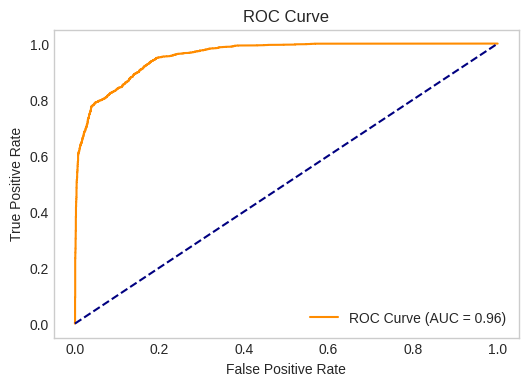

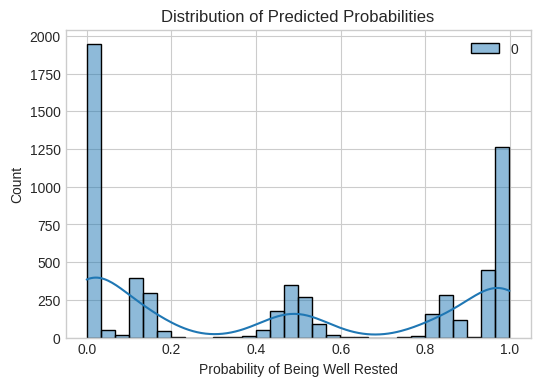

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)

# You already have df and missing values are filled
df['Well_Rested'] = (df['Sleep_Quality'] >= 75).astype(int)

# Use new feature set
features =['Hours_of_Sleep','Daily_Calorie_Intake', 'Stress_Level','Active_Heart_Rate','Resting_Heart_Rate']
X = df[features].values
y = df['Well_Rested'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Neural Network model with ReLU and hidden layers
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 32),
            # 1st hidden layer has 32
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()

        )

    def forward(self, x):
        return self.net(x)

model = NNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred_prob = model(X_test)
    y_pred = (y_pred_prob >= 0.5).float()

# Convert to numpy
y_true = y_test.numpy()
y_pred_np = y_pred.numpy()
y_prob_np = y_pred_prob.numpy()

# Metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_true, y_pred_np))
print("Precision:", precision_score(y_true, y_pred_np))
print("Recall:", recall_score(y_true, y_pred_np))
print("F1 Score:", f1_score(y_true, y_pred_np))
print("ROC AUC Score:", roc_auc_score(y_true, y_prob_np))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Rested', 'Well Rested'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_prob_np)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc_score(y_true, y_prob_np):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Probability Distribution
plt.figure(figsize=(6, 4))
sns.histplot(y_prob_np, bins=30, kde=True, color='purple')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of Being Well Rested")
plt.ylabel("Count")
plt.show()


**Summarizing Model Evaluation Metrics across : Logistic Regression, Perceptron and Deep Neuaral Networks**

## Enhanced Model Performance Comparison

| Metric           | Logistic Regression | Perceptron (Single-Layer NN) | Deep Neural Network |
|------------------|---------------------|-------------------------------|---------------------|
| **Accuracy**     | 0.8728              | 0.8752                        | 0.8715              |
| **Precision**    | 0.8409              | 0.9437                        | 0.8776              |
| **Recall**       | 0.8950              | 0.7771                        | 0.8400              |
| **F1 Score**     | 0.8671              | 0.8524                        | 0.8584              |
| **ROC AUC**      | 0.9579              | 0.9577                        | 0.9581              |
| **Confusion Matrix** | [[2747, 471], [292, 2490]] | - | - |

### 📌 Key Insights:

- **Logistic Regression**:
  - Strong overall performance with the **highest recall (0.895)**, meaning it captures most of the actual positives.
  - Slightly lower precision indicates more false positives than the perceptron.
  - Excellent ROC AUC indicates strong separability between classes.

- **Perceptron**:
  - **Highest precision (0.9437)**, meaning its positive predictions are highly reliable.
  - However, lower recall shows it misses more actual positives compared to other models.
  - Slightly higher accuracy due to conservative positive predictions.

- **Deep Neural Network**:
  - Provides a **balanced trade-off** between precision and recall.
  - F1 Score (0.8584) suggests this model generalizes well and is robust across both false positives and false negatives.
  - Highest ROC AUC (0.9581), indicating it has the best discrimination power among the three.